In [11]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# import the necessary packages
from sklearn.model_selection import train_test_split
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import random
import pickle
import time
import cv2
import os
os.chdir("/home/web428/Desktop/ChenJunhao/ECGdemo/biometricECG/")
!ls

BMD101						   models
cnn.ipynb					   progress.md
cnn.py						   __pycache__
cudnn-linux-x86_64-8.9.5.29_cuda12-archive	   README.md
cudnn-linux-x86_64-8.9.5.29_cuda12-archive.tar.xz  requirements.txt
data						   run.py
environment.yml					   setup.py
features.py					   signals.py
Final_Year_Presentation.pdf			   snn.ipynb
Final_Year_Project_Report.pdf			   snn.py
index.html					   test.py
LICENSE						   utils.py
media						   venv_biomet_py39


In [12]:
# load dataset
pickleIn = open('data/ready/pickles/cnn.pickle', 'rb')
people, y, x = pickle.load(pickleIn)

['100', '100', '100', '100', '100', '100', '100', '100', '100', '100']


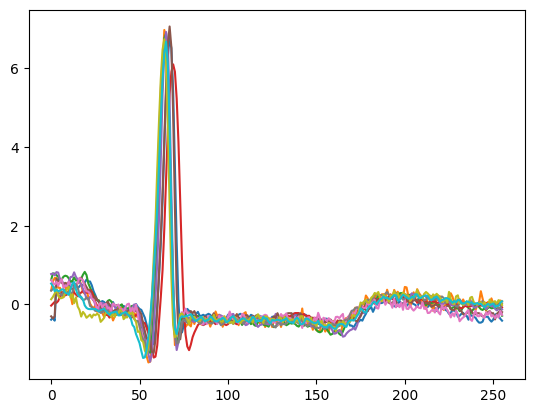

In [13]:
why = []
for i in range(10):
  why.append(y[i])
  plt.plot(x[i])
print(why)
plt.show()

100000
['100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100'

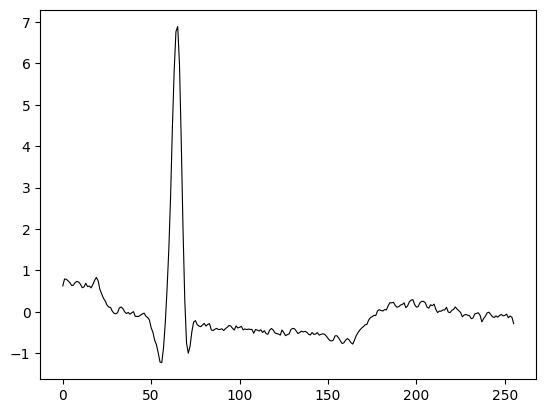

['115', '118', '124', '109', '207', '205', '118', '215', '105', '117', '212', '212', '201', '203', '116', '221', '115', '210', '107', '207', '106', '102', '213', '213', '113', '117', '200', '102', '106', '111', '102', '207', '208', '123', '108', '215', '118', '103', '114', '200', '207', '123', '109', '112', '108', '117', '220', '122', '119', '105', '213', '101', '113', '209', '212', '102', '205', '111', '200', '100', '102', '208', '103', '114', '115', '100', '101', '215', '118', '101', '219', '210', '108', '103', '215', '102', '221', '100', '220', '114', '205', '111', '202', '114', '123', '207', '119', '122', '118', '101', '203', '109', '200', '103', '219', '113', '200', '212', '213', '210', '104', '106', '203', '200', '111', '215', '109', '101', '117', '112', '104', '107', '207', '215', '109', '104', '124', '119', '112', '205', '202', '202', '221', '117', '103', '111', '220', '122', '203', '200', '107', '113', '221', '113', '116', '115', '217', '100', '108', '101', '101', '208', '201'

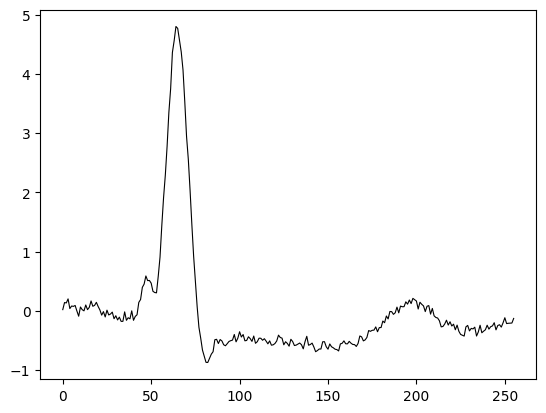

In [14]:
# shuffle data
from collections import Counter

# print(Counter(y))
length = len(y)
print(length)
data = []
for i in range(length):
  data.append([y[i], x[i]])

print(y)
print(y[2])

plt.plot(x[2], linewidth=0.8, color="k")
plt.show()

num = random.randint(0, length)
random.seed(num)
random.shuffle(data)

y, x = [], []
for k in range(length):
  y.append(data[k][0])
  x.append(data[k][1])

data, k, length, num = [], 0, 0, 0 # just for memory management

print(y)
print(y[2])

plt.plot(x[2], linewidth=0.8, color="k")
plt.show()

In [15]:
x = np.array(x)

print('Before Normalization\n')
print('Shape:', x.shape)
print('Min:', x.min(), 'Max:', x.max())
print(x.dtype)

print('\nAfter Normalization\n')

x = (x - x.min()) / (x.max() - x.min())
y = np.array(y)

print('Shape:', x.shape)
print('Min:', x.min(), 'Max:', x.max())
print(x.dtype)

Before Normalization

Shape: (100000, 256)
Min: -7.55071442090327 Max: 8.47450065612793
float64

After Normalization

Shape: (100000, 256)
Min: 0.0 Max: 1.0
float64


In [16]:
from sklearn.preprocessing import LabelBinarizer

SIG_DIMS = (x.shape[1], 1)

# binarize the labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, shuffle=True, random_state=42)

x_valid, x_test, y_valid, y_test = train_test_split(
    x_test, y_test, test_size=0.3, shuffle=True, random_state=42)

x, y = [], []  # just for memory management

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], SIG_DIMS[0], SIG_DIMS[1])
x_valid = x_valid.reshape(x_valid.shape[0], SIG_DIMS[0], SIG_DIMS[1])
x_test = x_test.reshape(x_test.shape[0], SIG_DIMS[0], SIG_DIMS[1])
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(60000, 256)
(60000, 256, 1)
(28000, 256, 1)
(12000, 256, 1)


In [17]:
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, concatenate, Conv1D, MaxPool1D, Activation, Flatten, Dropout, Dense, Input, Add
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
# from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
%load_ext tensorboard
from tensorflow.keras import layers
%matplotlib inline
import numpy as np
import random
import pickle
import time
import cv2
import os
import gc

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 100
BS = 64
SIG_DIMS = (x_train.shape[1], 1)
LR = 0.00001
decay = LR/EPOCHS
adam = Adam(learning_rate=LR,decay=decay)

def block(model, fs, ks, ps):
  model.add(Conv1D(filters=fs, kernel_size=ks, padding="same"))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool1D(pool_size=ps, padding='same'))
  return model

def SPPLayer(inp, spp_windows):
  p_poolings = []

  for pi in range(len(spp_windows)):
    p_poolings.append(Flatten()(MaxPool1D(pool_size=spp_windows[pi], padding='same')(inp)))
  out = concatenate(p_poolings, axis=-1)

  return out


In [19]:
folder = "models/cnn/"
if not os.path.exists(folder):
  os.makedirs(folder)

# save the label binarizer to disk
f = open(folder + "lb.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

# Model
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=1, padding="same", input_shape=SIG_DIMS))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Blocks
model = block(model, 32 * 2, 15, 2)
model = block(model, 32 * 4, 15, 2)
model = block(model, 32 * 8, 15, 2)
model = block(model, 32 * 16, 15, 2)
last = 1 + 2 + 4 + 8 + 16
model = block(model, 32 * last, 15, 2)

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(32 * last))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# softmax classifier
model.add(Dense(len(lb.classes_)))
model.add(Activation("softmax"))

print(model.summary())

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

STEPS_PER_EPOCH = len(x_train) // BS
VAL_STEPS_PER_EPOCH = len(x_valid) // BS

bestmodel = folder + "debbis"
checkpointer = ModelCheckpoint(filepath=bestmodel, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Define the Keras TensorBoard callback.
logdir = folder + "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

# fit network
t = time.time()

H = model.fit(x_train, y_train, batch_size=BS,
              validation_data=(x_valid, y_valid),
              steps_per_epoch=STEPS_PER_EPOCH,
              validation_steps=VAL_STEPS_PER_EPOCH,
              epochs=EPOCHS, verbose=1, 
              callbacks=[tensorboard_callback, checkpointer, early_stopping])

print('\nTraining time: ', time.time() - t)

# save the model to disk
model.save(bestmodel)

# evaluate model
_, accuracy = model.evaluate(x_test, y_test, batch_size=BS, verbose=1)
print('\n', 'Test accuracy:', accuracy, '\n')

# plot the training loss and accuracy
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 256, 32)           64        
                                                                 
 batch_normalization_7 (Batc  (None, 256, 32)          128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 256, 32)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 256, 64)           30784     
                                                                 
 batch_normalization_8 (Batc  (None, 256, 64)          256       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 256, 64)          

Epoch 1/100


2023-09-14 18:25:25.526838: W tensorflow/core/framework/op_kernel.cc:1733] INTERNAL: 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_VALUE'


InternalError: Graph execution error:

Detected at node 'sequential_1/activation_8/Relu' defined at (most recent call last):
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_3192424/2970223226.py", line 54, in <module>
      H = model.fit(x_train, y_train, batch_size=BS,
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/layers/core/activation.py", line 57, in call
      return self.activation(inputs)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "/home/web428/anaconda3/envs/biomet_py39/lib/python3.9/site-packages/keras/backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/activation_8/Relu'
'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_VALUE'
	 [[{{node sequential_1/activation_8/Relu}}]] [Op:__inference_train_function_6927]

In [ ]:
%tensorboard --logdir models/auth/8/logs/fit

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('\n', 'Test accuracy:', accuracy, '\n')

375/375 [==============================] - 4s 9ms/step - loss: 0.0058 - accuracy: 0.9987

 Test accuracy: 0.9986666440963745 



In [ ]:
from sklearn.metrics import classification_report

lbb = LabelBinarizer()
predictions = model.predict(x_test, batch_size=BS, verbose=1)
y_pred_bool = np.argmax(predictions, axis=1)
y_pred_bool = lbb.fit_transform(y_pred_bool)
print(classification_report(y_test, y_pred_bool))

188/188 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00       328
           4       1.00      1.00      1.00       305
           5       1.00      1.00      1.00       313
           6       1.00      1.00      1.00       318
           7       1.00      1.00      1.00       324
           8       1.00      1.00      1.00       290
           9       1.00      1.00      1.00       303
          10       1.00      1.00      1.00       319
          11       1.00      1.00      1.00       301
          12       1.00      1.00      1.00       297
          13       1.00      1.00      1.00       317
          14       1.00      1.00      1.00       289
          15       0.99      1.00      1.00       281
          16       1.00  

In [ ]:
predictions = model.predict(x_test)
print(len(predictions))

up, down = [], []
for i in predictions:
  pred = max(i)
  if pred >= 0.99:
    up.append(pred)
  else:
    down.append(pred)
  
print("Up:", len(up))
print(up, "\n")
print("Down:", len(down))
print(down, "\n")

fig = plt.figure(figsize=(64, 54))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=225, replace=False)):
    pred_idx = np.argmax(predictions[idx])
    true_idx = np.argmax(y_test[idx])
    probs = predictions[pred_idx]
    prob = max(predictions[pred_idx])
    ax = fig.add_subplot(15, 15, i + 1, xticks=[], yticks=[])
    ax.plot(x_test[idx])
    ax.set_title("T: {} P: {} {:.6f}".format(lb.classes_[true_idx], lb.classes_[pred_idx], prob),
                 color=("green" if pred_idx == true_idx else "red"))
    # ax.set_xlabel(probs)

Confusion matrix, without normalization
[[1172    0    0 ...    0    0    0]
 [   0 1169    0 ...    0    0    0]
 [   0    0 1261 ...    0    0    0]
 ...
 [   0    0    0 ... 1279    0    0]
 [   0    0    0 ...    0 1168    0]
 [   0    0    0 ...    0    0 1158]]


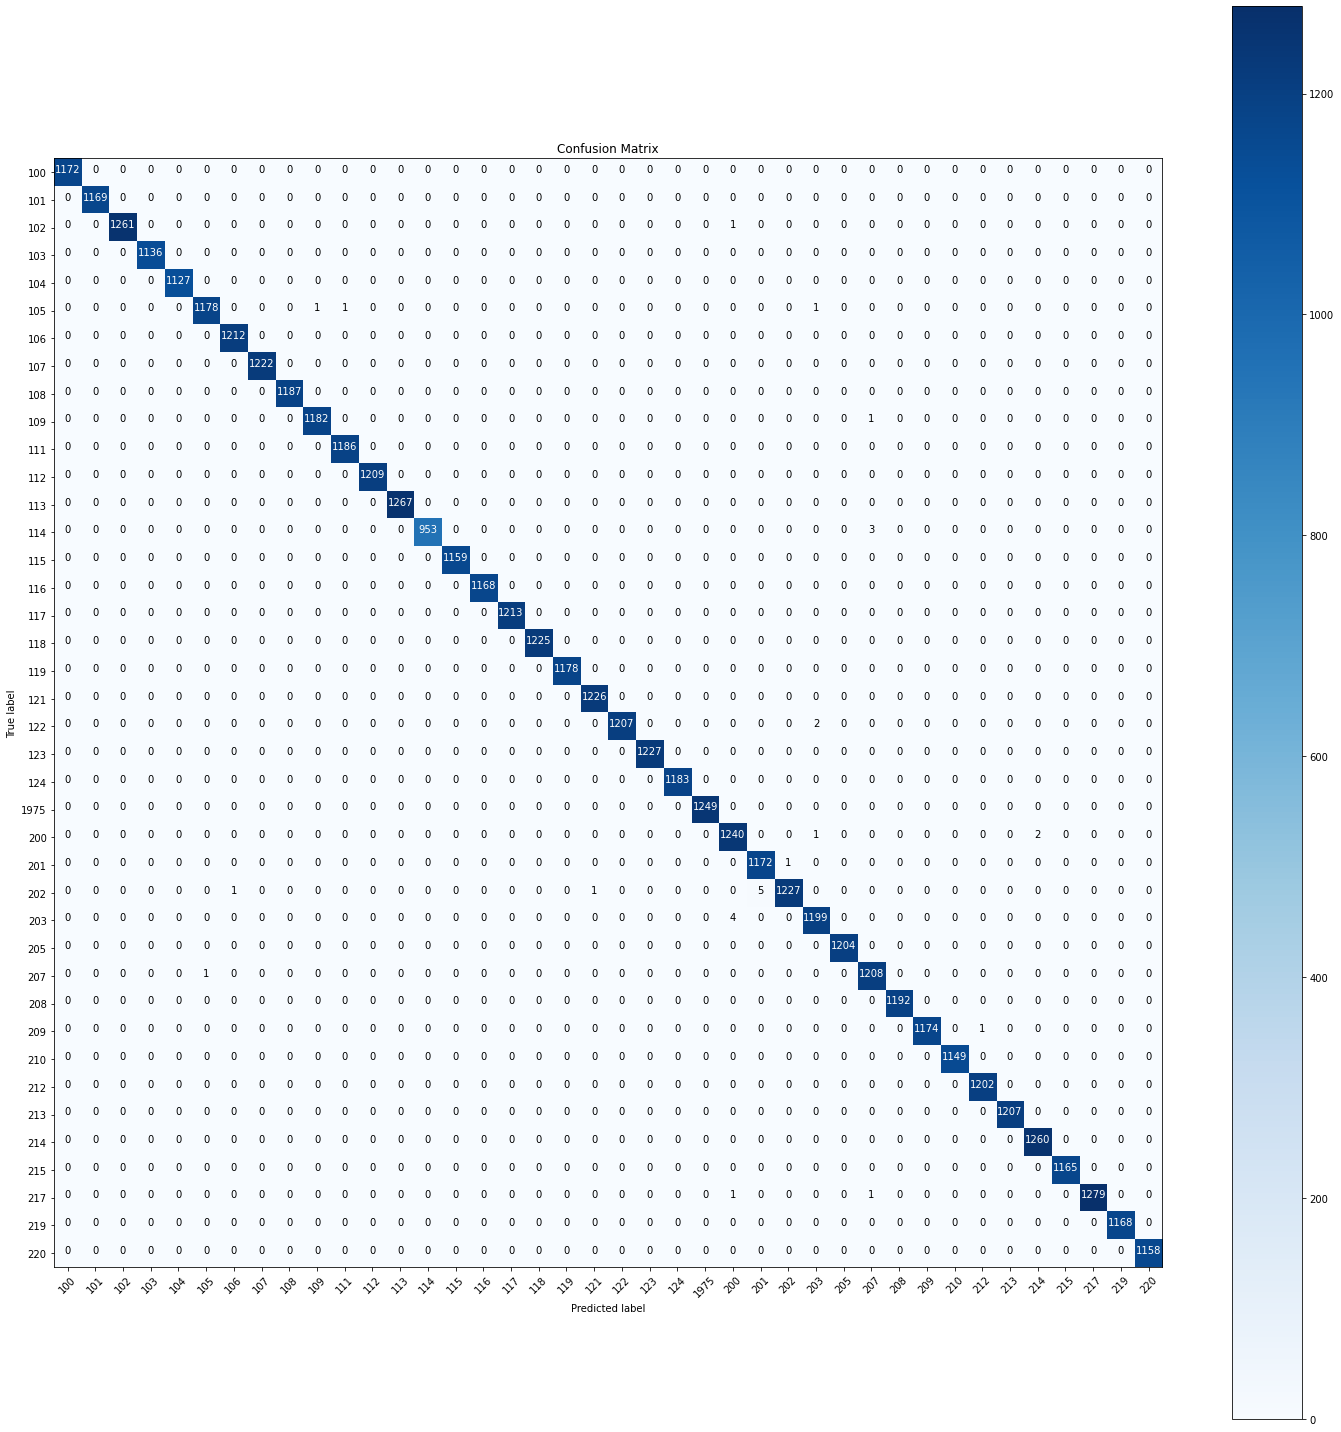

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

test = np.argmax(y_test, axis=1)
preds = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true=test, y_pred=preds)
plot_confusion_matrix(cm=cm, classes=lb.classes_, title='Confusion Matrix')